In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale
from libpysal.weights import Queen

import libpysal
from libpysal import examples
import os
import region as rg
from pysal.viz.splot.libpysal import plot_spatial_weights
from libpysal.weights import Queen, Rook
from region.max_p_regions.heuristics import MaxPRegionsHeu
from region.p_regions.azp import AZPBasicTabu
import math


sns.set(style="whitegrid")

C:\Users\user\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [6]:
abb_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\kodlar\\data_phyton\\data_codes.csv'
zc_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\Benim oluşturduğum datalar\\map.geojson'

In [7]:
lst=pd.read_csv(abb_link)


In [8]:
zc = gpd.read_file(zc_link)



In [9]:
price=[i for i in lst if 'price-' in i]

In [10]:
#daily_price = lst.mean(axis=1)

#lst['daily_price']=daily_price

#daily_price=[i for i in lst if 'daily_price' in i]
#daily_price

rt_av = lst.groupby('zipcode')[price]\
.mean()



In [11]:
zrt = zc[['geometry','zipcode']].join(rt_av,on='zipcode')\
                                 .dropna()


In [12]:
zrt.to_file('tnp')
gdf=gpd.read_file('C:\\Users\\user\\Desktop\\Arastirma Gorevi\\tnp\\tnp.shp')
w_queen=Queen.from_dataframe(gdf)
w_rook=Rook.from_dataframe(gdf)



In [13]:
thr=[]
thr_katsayisi=[0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2]


#thr_katsayisi=0.25
#thr_=thr_katsayisi*rt_av.sum()
#thr_mean=thr_.mean()
#thr=[]
#thr2=[]
#thr_farkli=[]
#for i in range(24):
#    thr2.append(thr_mean)
#for i in range(24):
#    thr.append(math.ceil(thr2[i]))
#for i in range(24):
#    thr_farkli.append(math.ceil(thr_[i]))
#print(thr_farkli)

#print(thr)

In [14]:
z = zrt.drop(['geometry', 'zipcode'], axis=1).values


In [15]:
model_q = MaxPRegionsHeu(random_state=1)
label_num=[]
for i in range(12):
    thr.append([round(x) for x in thr_katsayisi[i]*rt_av.sum()]) 
    model_q.fit_from_w(w_queen,z,rt_av.values[:, None], thr)
    print(thr)
    thr.clear()
    label_num.append(max(model_q.labels_)+1)
    print(label_num)


[[16, 18, 19, 18, 12, 12, 18, 23, 24, 20, 20, 19, 17, 19, 19, 18, 18, 18, 13, 12, 15, 18, 19, 11]]
[50.0]
[[32, 37, 38, 37, 23, 24, 37, 45, 48, 41, 41, 39, 33, 39, 39, 37, 36, 36, 25, 24, 30, 37, 38, 23]]
[50.0, 28.0]
[[48, 55, 56, 55, 35, 36, 55, 68, 72, 61, 61, 58, 50, 58, 58, 55, 54, 54, 38, 36, 44, 55, 57, 34]]
[50.0, 28.0, 18.0]
[[64, 74, 75, 74, 47, 48, 74, 91, 97, 81, 82, 78, 67, 78, 77, 74, 72, 71, 51, 48, 59, 73, 75, 45]]
[50.0, 28.0, 18.0, 15.0]
[[80, 92, 94, 92, 58, 60, 92, 114, 121, 101, 102, 97, 83, 97, 97, 92, 90, 89, 64, 59, 74, 92, 94, 57]]
[50.0, 28.0, 18.0, 15.0, 11.0]
[[159, 184, 188, 185, 117, 121, 185, 227, 241, 203, 205, 195, 166, 194, 193, 184, 181, 179, 127, 119, 148, 183, 189, 113]]
[50.0, 28.0, 18.0, 15.0, 11.0, 5.0]
[[175, 203, 207, 203, 129, 133, 203, 250, 266, 223, 225, 214, 183, 213, 213, 202, 199, 197, 140, 131, 163, 201, 207, 125]]
[50.0, 28.0, 18.0, 15.0, 11.0, 5.0, 5.0]
[[191, 221, 225, 222, 140, 145, 222, 273, 290, 243, 245, 234, 200, 233, 232, 221, 2

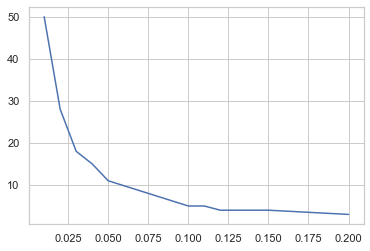

In [16]:
plt.plot(thr_katsayisi,label_num)

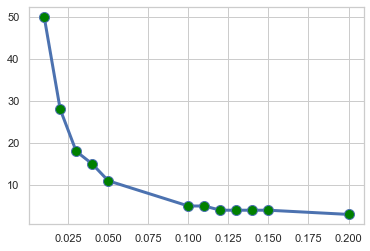

In [17]:
plt.plot(thr_katsayisi,label_num , linewidth = 3, 
         marker='o', markerfacecolor='green', markersize=10) 

In [9]:
#model_r =MaxPRegionsHeu(random_state=2)
#model_r.fit_from_w(w_rook,z,rt_av.values[:,None],thr_farkli)


In [14]:
#gdf.plot(column = model_q.labels_, categorical = True, figsize = (15, 15), legend = True)

In [15]:
#gdf.plot(column = model_r.labels_, categorical = True, figsize = (15, 15), legend = True)